<a href="https://colab.research.google.com/github/amihaikal/Machine-Learning/blob/main/ML_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_image_from_url(image_url):
  # If the temporary test_image.jpg file already exists,
  # delete it so a new one can be made.
  if os.path.exists('/root/.keras/datasets/test_image.jpg'):
    os.remove('/root/.keras/datasets/test_image.jpg')

  image_path = tf.keras.utils.get_file('test_image.jpg', origin=image_url)
  return image_path

In [3]:
def print_classifications(classifications):
    for (classification, number) in zip(classifications[0], range(1, len(classifications[0])+1)):
      print('{}. {} {:.2f}%'.format(number, classification[1], classification[2]*100))

In [4]:
model =tf.keras.applications.VGG16()

553467096/553467096 [==============================] - 18s 0us/step


In [5]:
def classify_image(image_url):
  image_path=get_image_from_url(image_url)
  image=tf.keras.preprocessing.image.load_img(image_path,target_size=(224,224))
  plt.figure()
  plt.imshow(image)
  image= tf.keras.preprocessing.image.img_to_array(image)
  image=np.expand_dims(image,axis=0)
  print(image)
  classification_result=model.predict(image,batch_size=1)
  classifications=tf.keras.applications.imagenet_utils.decode_predictions(classification_result,top=10)
  print_classifications(classifications)

180036/180036 [==============================] - 0s 0us/step
[[[[213. 192. 175.]
   [216. 200. 187.]
   [211. 198. 189.]
   ...
   [171. 181. 170.]
   [168. 178. 170.]
   [173. 182. 179.]]

  [[216. 199. 183.]
   [215. 198. 182.]
   [208. 192. 176.]
   ...
   [164. 170. 160.]
   [166. 171. 165.]
   [174. 178. 177.]]

  [[219. 201. 187.]
   [218. 200. 186.]
   [212. 194. 180.]
   ...
   [168. 171. 160.]
   [170. 175. 171.]
   [170. 176. 174.]]

  ...

  [[214. 177. 161.]
   [213. 177. 161.]
   [208. 175. 158.]
   ...
   [ 14.  30.  53.]
   [  9.  26.  52.]
   [  6.  25.  55.]]

  [[212. 179. 164.]
   [212. 178. 166.]
   [212. 178. 168.]
   ...
   [ 12.  28.  51.]
   [  8.  25.  51.]
   [  6.  25.  55.]]

  [[209. 180. 164.]
   [208. 179. 165.]
   [208. 178. 167.]
   ...
   [ 10.  28.  52.]
   [  5.  25.  52.]
   [  1.  24.  56.]]]]
1/1 [==============================] - 1s 931ms/step
1. tabby 32.22%
2. tiger_cat 30.67%
3. Egyptian_cat 24.94%
4. lynx 8.94%
5. cougar 1.92%
6. grey_fox 0.6

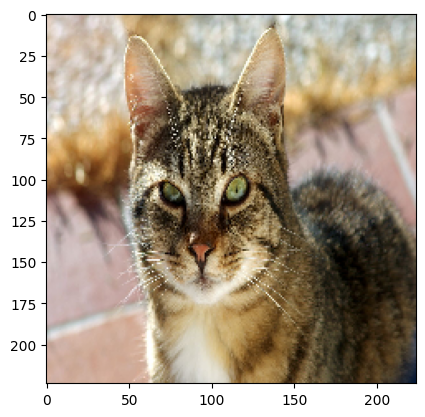

In [7]:
classify_image('https://drive.google.com/uc?export=download&id=19PXsdlkTjLijoBfE4PYEAIqDjT--q0TH')